In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# European Education Data Analysis

This notebook presents an analysis of data derived from [Eurostat](https://ec.europa.eu/eurostat/data/database) that summarises the spending of member states on Education.   The dataset is derived from those downloadable from the Eurostat site, this one contains more data than the one used in workshop 2. 

The data represents the spending on education as a fraction of GDP in a number of European countries.

We first load the data and inspect the general shape and columns that are provided.

In [2]:
edufile = 'files/educ_figdp_full.csv'
edu = pd.read_csv(edufile,  na_values=':')
edu.head()

,TIME,GEO,INDIC_ED,UNIT,Value
0,2002,Belgium,Total public expenditure on education as % of ...,Percentage,6.09
1,2002,Belgium,Total public expenditure on education as % of ...,Percentage,1.36
2,2002,Belgium,Total public expenditure on education as % of ...,Percentage,2.71
3,2002,Belgium,Total public expenditure on education as % of ...,Percentage,1.32
4,2002,Belgium,Total public expenditure on education as % of ...,Percentage,0.70


__Note__ that this version of the data has many rows for each year and Geographic region. The `INDIC_ED` column defnies a number of different measures. So the first thing to do is to examine what the possible values of this field are and then filter the data to look at just one. This is an example of canonical or melted data, where each row contains only one value and what that value represents is indicated by the other columns.

In [3]:
# unique values of the INDIC_ID field
edu.INDIC_ED.unique()

array(['Total public expenditure on education as % of GDP, for all levels of education combined',
       'Total public expenditure on education as % of GDP, at primary level of education (ISCED 1)',
       'Total public expenditure on education as % of GDP, at secondary level of education (ISCED 2-4)',
       'Total public expenditure on education as % of GDP, at tertiary level of education (ISCED 5-6)',
       'Total public expenditure on education as % of GDP, at pre-primary level of education (ISCED 0) and not allocated by level',
       'Expenditure on educational institutions from public sources as % of GDP, for all levels of government combined',
       'Public subsidies to the private sector as % of GDP, for all levels of education combined',
       'Total public expenditure on education as % of total public expenditure, for all levels of education combined',
       'Expenditure on educational institutions from public sources as % of total public expenditure, for all levels of e

We'll use the first of those fields - all levels of education combined.

In [4]:
edu = edu[edu.INDIC_ED == 'Total public expenditure on education as % of GDP, for all levels of education combined']
# drop the INDIC_ED column since it only has one value now
edu = edu.drop(['INDIC_ED', 'UNIT'], axis=1)

print(edu.shape)
edu.head()

(350, 3)


,TIME,GEO,Value
0,2002,Belgium,6.09
12,2002,Bulgaria,3.94
24,2002,Czechia,4.15
36,2002,Denmark,8.44
48,2002,Germany (until 1990 former territory of the FRG),4.72


The first thing we can see is that the data consists of many rows, each representing a value of Educational spending for a given country (or group of countries) in a given year.  For example, the row with index 48 represents the spending by Belgium in 2002:

In [5]:
edu.loc[36]

TIME        2002
GEO      Denmark
Value       8.44
Name: 36, dtype: object

## Remove NaN Rows

We note that some rows have the value `NaN` (Not a Number) which means they are unknown.  Since we can't do anything useful with these rows we'll just drop them from the DataFrame.  We'll then look at the summary statistics of the remaining data.

In [6]:
edu = edu.dropna()
edu.describe()

,TIME,Value
count,315.000000,315.000000
mean,2006.374603,5.303302
std,2.900580,1.316144
min,2002.000000,1.920000
25%,2004.000000,4.355000
50%,2006.000000,5.280000
75%,2009.000000,5.980000
max,2011.000000,8.810000


We're left with 355 entries.  The `Value` field ranges from 1.92 to 8.8 and has a mean of 5.3.

## Starting Analysis

Let's now look at the range of countries represented in the data by looking at the unique values of the GEO column:

In [7]:
print(edu.GEO.unique())
print(len(edu.GEO.unique()))

['Belgium' 'Bulgaria' 'Czechia' 'Denmark'
 'Germany (until 1990 former territory of the FRG)' 'Estonia' 'Ireland'
 'Greece' 'Spain' 'France' 'Croatia' 'Italy' 'Cyprus' 'Latvia' 'Lithuania'
 'Luxembourg' 'Hungary' 'Malta' 'Netherlands' 'Austria' 'Poland'
 'Portugal' 'Romania' 'Slovenia' 'Slovakia' 'Finland' 'Sweden' 'Iceland'
 'Liechtenstein' 'Norway' 'Switzerland' 'United Kingdom' 'North Macedonia'
 'Turkey']
34


It contains data on a number of European countries as well as some combined groupings of the EU.  Let's compare some different countries by selecting just the rows for each country and looking at the summary statistics.  For example, comparing Romania and France.

In [8]:
edu_romania = edu[edu.GEO == 'Romania']
edu_romania.describe()

,TIME,Value
count,8.000000,8.000000
mean,2006.375000,3.601250
std,3.377975,0.425153
min,2002.000000,3.070000
25%,2003.750000,3.407500
50%,2006.000000,3.495000
75%,2009.250000,3.707500
max,2011.000000,4.250000


In [9]:
edu_france = edu[edu.GEO == 'France']
edu_france.describe()

,TIME,Value
count,10.00000,10.000000
mean,2006.50000,5.758000
std,3.02765,0.130196
min,2002.00000,5.610000
25%,2004.25000,5.632500
50%,2006.50000,5.740000
75%,2008.75000,5.890000
max,2011.00000,5.920000


The spending in France averages 5.8% of GDP over the reporting period compared with 3.6% for Romania.  We also see that Romania's values are more varied with a standard deviation of 0.43 compared with 0.14 for France.  To get a better picture of the values for each country we can plot them, but we take care to use the same axes for both plots so that we can compare them.

<AxesSubplot:xlabel='TIME'>

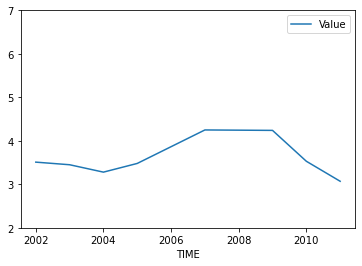

In [10]:
edu_romania.plot(x='TIME', y='Value', ylim=(2,7))

<AxesSubplot:xlabel='TIME'>

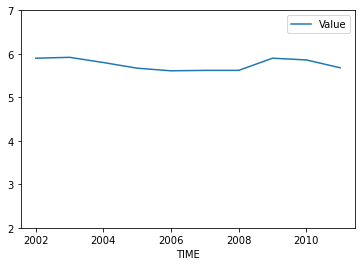

In [11]:
edu_france.plot(x='TIME', y='Value', ylim=(2,7))

## Pivot

An alternate way to look at this data is to arrange it by the GEO column with one column per year.  We can do this using the `pivot` method of the data frame and it makes the table of data much easier to read.

In [12]:
edu_pivot = edu.pivot(index='GEO', columns='TIME', values='Value')
edu_pivot.head()

TIME,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
GEO,,,,,,,,,,
Austria,5.68,5.53,5.48,5.44,5.40,5.33,5.47,5.98,5.91,5.80
Belgium,6.09,6.02,5.95,5.92,5.98,6.00,6.43,6.57,6.58,6.55
Bulgaria,3.94,4.09,4.40,4.25,4.04,3.88,4.44,4.58,4.10,3.82
Croatia,3.71,3.93,3.87,3.98,4.04,4.02,4.32,4.42,4.31,4.21
Cyprus,6.60,7.37,6.77,6.95,7.02,6.95,7.45,7.98,7.92,7.87


In [13]:
edu_pivot = edu_pivot.rename_axis(None).dropna(axis=0)

With the data in this form we can generate a composite plot quite easily using the plot method. Unfortunately the default plot puts the rows (GEO) on the x-axis and draws one line per column (year). __This is not that useful__.
 

<AxesSubplot:>

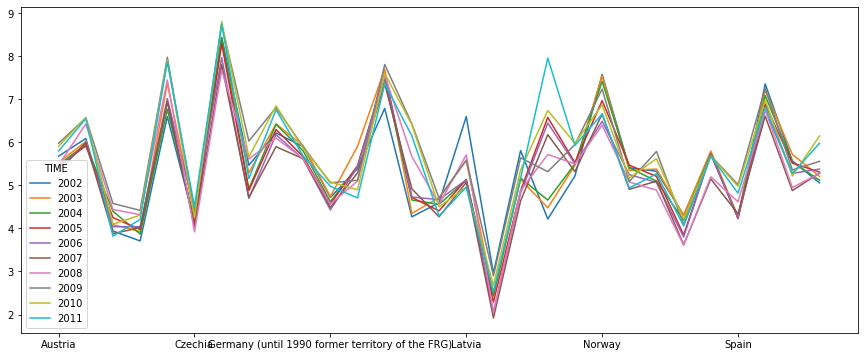

In [14]:
edu_pivot.plot(figsize=(15,6))

To get a more useful plot we can transpose the data frame which flips the rows and columns. We then plot it quite large (using the `figsize` argument) to allow us to see the legend.

In [15]:
edu_pivot.transpose().head()

,Austria,Belgium,Bulgaria,Croatia,Cyprus,Czechia,Denmark,Estonia,Finland,France,...,Netherlands,Norway,Poland,Portugal,Slovakia,Slovenia,Spain,Sweden,Switzerland,United Kingdom
TIME,,,,,,,,,,,,,,,,,,,,,
2002,5.68,6.09,3.94,3.71,6.60,4.15,8.44,5.47,6.22,5.90,...,5.22,7.58,5.41,5.33,4.31,5.76,4.25,7.36,5.57,5.06
2003,5.53,6.02,4.09,3.93,7.37,4.32,8.33,5.29,6.43,5.92,...,5.47,7.55,5.35,5.38,4.30,5.80,4.28,7.21,5.72,5.21
2004,5.48,5.95,4.40,3.87,6.77,4.20,8.43,4.92,6.42,5.80,...,5.50,7.42,5.41,5.10,4.19,5.74,4.25,7.09,5.55,5.12
2005,5.44,5.92,4.25,3.98,6.95,4.08,8.30,4.88,6.30,5.67,...,5.53,6.97,5.47,5.21,3.85,5.73,4.23,6.89,5.52,5.31
2006,5.40,5.98,4.04,4.04,7.02,4.42,7.97,4.70,6.18,5.61,...,5.50,6.49,5.25,5.07,3.80,5.72,4.26,6.75,5.28,5.38


<AxesSubplot:xlabel='TIME'>

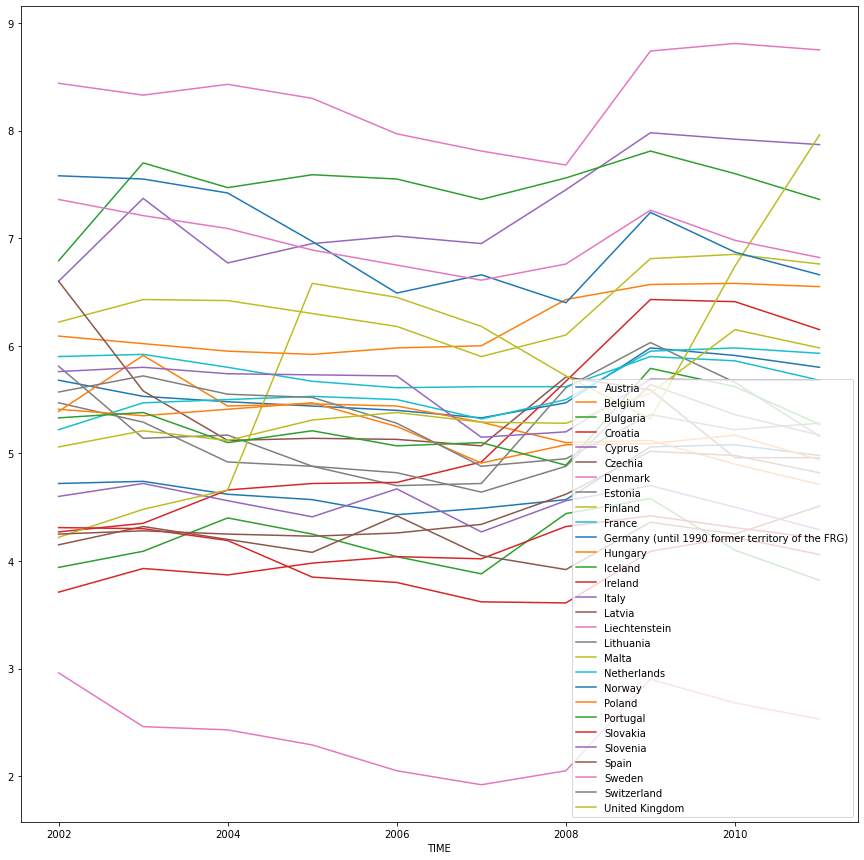

In [16]:
edu_pivot.transpose().plot(figsize=(15,15))

Unfortunately this plot isn't that informative as it is difficult to see which country is which.  The main thing we can see from the plot is that there are big differences between countries and some countries that have changed significantly over the reporting period (eg. the purple line  that starts at 4.5 and ends at 8).  
